# ¿A que se debe la perdida de los clientes?

# ¿Que deberiamos cambiar para mejorar esta situación?

In [ ]:
import pandas as pd
import plotly.express as px # Liberia para graficar mapas, no la logre usar
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


# Importadores que uso el profesor en la clase que uso Bokeh
import bokeh as bk
from bokeh.palettes import Spectral6
from bokeh.io import show, output_notebook
from bokeh.models import CategoricalColorMapper, ColumnDataSource, FactorRange
from bokeh.plotting import figure
from bokeh.models import HoverTool
from bokeh.io import output_notebook # Sumamente importante tenerlo

from bokeh.resources import INLINE
output_notebook(INLINE)





## Introduccion

**Contexto empresarial.** La empresa Telco ha exprimientado una perdida muy significativa de clientes en el ultimo trimestre. Necesitan encontrar la causa y una solucion para dicho problema.
A partir de esto se recopilo toda la informacion que se tenia de los clientes del ultimo trimestre(Estado del servicio de los clientes, Informacion detallada de los clientes y Detalles de los contratos de los clientes).

La empresa te ha contratado para que construyas visualizaciones que les ayuden a identificar las causas principales de las perdidas, como solucionar el problema para prevenir posibles perdidas a futuro y como recuperar a los clientes perdidos.


**Problema comercial.** Su tarea es formatear los datos proporcionados y proporcionar visualizaciones que respondan las preguntas específicas que tiene el cliente, que se mencionan a continuación.

**Contexto analítico.** Se le proporciona tres archivos CSV (almacenado en la carpeta ```datos``` ya creada). A continuacion se detalla el nombre de cada uno de los archivos y los detalles de como se componen:

*  Telco_customer_churn_services: Detalles de los contratos de los clientes.
*  Telco_customer_churn_status: Estado del servicio de los clientes.
*  Telco_customer_churn_demographics: Informacion detallada de los clientes.

El delimitador en el archivo CSV dado es `,`. 

Realizará las siguientes tareas con los datos:

1. Extraiga datos adicionales de los DataFrame brindados en un archivo JSON
2. Leer, transformar y preparar datos para su visualización
3. Realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos.
        
El cliente tiene un conjunto específico de preguntas a las que le gustaría obtener respuestas. Deberá proporcionar visualizaciones para acompañar estos:

1. ¿Que porcentaje de clientes perdimos en el ultimo trimestre?
2. ¿Cual es la causa principal de la perdida de clientes?
3. ¿Que varibles tienen en comun los clientes que descontrataron el servicio (Por ejemplo: Edad, genero, etc)?
4. ¿Que tipo de contranto tenian la mayoria de los clientes que abandonaron la empresa?
5. ¿Cuantas ofertas de servicios tuvieron los clientes que abandonaron la empresa?
6. ¿De que zona son la mayoria de los clientes que abanadon el servicio? 


## Overview de la data

In [ ]:
from google.colab import drive
import os
import pandas as pd
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Data Science/Proyectos Clientes Telecom/datos'


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Data Science/Proyectos Clientes Telecom/datos


###Data Wrangling

In [ ]:
poblacion_codigopostal = "Telco_customer_churn_population.csv"
df5 = pd.read_csv (poblacion_codigopostal) # Informacion de los codigos postales 
df5 = df5.rename(columns={'ID':'Customer ID'})
df5

,Customer ID,Zip Code,Population
0,1,90001,54492
1,2,90002,44586
2,3,90003,58198
3,4,90004,67852
4,5,90005,43019
...,...,...,...
1666,1667,96145,4002
1667,1668,96146,942
1668,1669,96148,678
1669,1670,96150,33038


In [ ]:

#importacion de DataFrames

tipo_contrtato = "Telco_customer_churn_services.csv"
df1 = pd.read_csv (tipo_contrtato)      # Detalles de los contratos de los clientes

estado_del_servicio = "Telco_customer_churn_status.csv"
df2 = pd.read_csv (estado_del_servicio ) # Estado del servicio de los clientes

datos_clientes = "Telco_customer_churn_demographics.csv"
df3 = pd.read_csv (datos_clientes )      # Informacion detallada de los clientes

ubicacion_clientes = "Telco_customer_churn_location.csv" 
df4 = pd.read_csv (ubicacion_clientes) # Informacion de la ubicacion de los clientes
df4 = df4.rename(columns={'Zip Code':'Zip_Code'})

poblacion_codigopostal = "Telco_customer_churn_population.csv"
df5 = pd.read_csv (poblacion_codigopostal) # Informacion de los codigos postales 
df5 = df5.rename(columns={'Zip Code':'Zip_Code'})

# Uno los dos DataFrame df1 y df2 en función de la columna “Customer ID”
df_comb_1_2 = pd.merge(df2, df1, on='Customer ID')

# Uno los dos DataFrame df4 y df5 en función de la columna “Zip_Code”
df_comb_4_5 = pd.merge(df4, df5, on='Zip_Code')

# Uno los dos DataFrame df_comb_1_2  y df_comb_4_5 en función de la columna “Customer ID”
df_comb = pd.merge(df_comb_1_2, df_comb_4_5, on='Customer ID')

# Uno los dos DataFrame df_comb y df3 en función de la columna “Customer ID”
df_final = pd.merge(df_comb, df3, on='Customer ID')

# Renombro la columna que tiene un espacio para poder manipularla
df_final = df_final.rename(columns={'Churn Value':'Churn_Value', 
                                    'Tenure in Months': 'Tenure_in_Months', 
                                    'Total Charges' : 'Total_Charges',
                                    'Churn Label': 'Churn_Label', 
                                    'Number of Referrals': 'Number_of_Referrals',
                                    'Customer ID':'Customer_ID',
                                    'Customer Status':'Customer_Status',
                                    'Churn Category':'Churn_Category',
                                    'Churn Reason':'Churn_Reason',
                                    'Referred a Friend':'Referred_a_Friend',
                                    'Phone Service':'Phone_Service',
                                    'Avg Monthly Long Distance Charges':'Avg_Monthly_Long_Distance_Charges',
                                    'Multiple Lines ':'Multiple_Lines_',
                                    'Internet Service':'Internet_Service',
                                    'Internet Type':'Internet_Type',
                                    'Avg Monthly GB Download':'Avg_Monthly_GB_Download',
                                    'Online Security':'Online_Security',
                                    'Online Backup':'Online_Backup',
                                    'Device Protection Plan':'Device_Protection_Plan',
                                    'Premium Tech Support':'Premium_Tech_Support',
                                    'Streaming TV':'Streaming_TV',
                                    'Streaming Movies':'Streaming_Movies',
                                    'Streaming Music':'Streaming_Music',
                                    'Unlimited Dat':'Unlimited_Dat',
                                    'Paperless Billing':'Paperless_Billing',
                                    'Payment Method':'Payment_Method',
                                    'Monthly Charge':'Monthly_Charge',
                                    'Total Refunds':'Total_Refunds',
                                    'Total Extra Data Charges':'Total_Extra_Data_Charges',
                                    'Total Long Distance Charges':'Total_Long_Distance_Charges',
                                    'Total Revenue':'Total_Revenue',
                                    'Under 30':'Under_30',
                                    'Senior Citizen':'Senior_Citizen',
                                    'Number of Dependents':'Number_of_Dependents'
                           }
                           )

# Elimino las columnas duplicadas

df_final =  df_final.drop(columns=['Count_x'], axis = 1)
df_final =  df_final.drop(columns=['Count_y'], axis = 1) 
df_final =  df_final.drop(columns=['Quarter_y'], axis = 1)

df_final = df_final.replace({"Female": "F", "Male": "M"}) # Remplazo los valores de genero



# Imprimimos el Data Set final
df_final.head(5)


<ipython-input-48-972a9ef43bb1>:30: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Count_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_final = pd.merge(df_comb, df3, on='Customer ID')


,Customer ID,Quarter_x,Customer Status,Churn_Label,Churn_Value,Churn Category,Churn Reason,Referred a Friend,Number_of_Referrals,Tenure_in_Months,...,Longitude,ID,Population,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
0,8779-QRDMV,Q3,Churned,Yes,1,Competitor,Competitor offered more data,No,0,1,...,-118.156582,21,68701,M,78,No,Yes,No,No,0
1,7495-OOKFY,Q3,Churned,Yes,1,Competitor,Competitor made better offer,Yes,1,8,...,-118.185237,54,55668,F,74,No,Yes,Yes,Yes,1
2,1658-BYGOY,Q3,Churned,Yes,1,Competitor,Competitor made better offer,No,0,18,...,-118.229715,56,47534,M,71,No,Yes,No,Yes,3
3,4598-XLKNJ,Q3,Churned,Yes,1,Dissatisfaction,Limited range of services,Yes,1,25,...,-118.332639,100,27778,F,78,No,Yes,Yes,Yes,1
4,4846-WHAFZ,Q3,Churned,Yes,1,Price,Extra data charges,Yes,1,37,...,-118.020188,114,26265,F,80,No,Yes,Yes,Yes,1


In [ ]:
#Limpiar Nulls / Falta analizar si esta bien eliminarlos
#Cuento los valores Nulos
print (df_final.isnull().sum())

#Remplazo los valores nullos por el valor "No_data"
df_final = df_final.fillna ("No_data")

#Hago la sumatoria de los valores nulos para verificar el resultaldo
print (df_final.isnull().sum().sum())


Customer ID                             0
Quarter_x                               0
Customer Status                         0
Churn_Label                             0
Churn_Value                             0
Churn Category                       5174
Churn Reason                         5174
Referred a Friend                       0
Number_of_Referrals                     0
Tenure_in_Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                           0
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                   

In [ ]:
df_final.columns

Index(['Customer ID', 'Count_x', 'Quarter_x', 'Customer Status', 'Churn_Label',
       'Churn_Value', 'Churn Category', 'Churn Reason', 'Count_y', 'Quarter_y',
       'Referred a Friend', 'Number_of_Referrals', 'Tenure_in_Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total_Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Count_x', 'Country', 'State', 'City', 'Zip_Code',
       'Latitude', 'Longitude', 'ID', 'Population', 'Count_y', 'Gender', 'Age',
       'Under 30', 'Senior Citizen', 'Married', 'Dependents',
       'Number of Dependents'],
     

Tenemos las siguientes columnas en cada uno de los DataFrame:
1.   **Telco_customer_churn_services:**
          *   Customer ID: Una identificación única que identifica a cada cliente.
          *   Count: Un valor que se utiliza en los informes/paneles para resumir el número de clientes en un conjunto filtrado.
          *   Quarter: El trimestre del que se derivaron los datos (por ejemplo, Q3).
          *   Referred a Friend: Indica si el cliente alguna vez recomendó a un amigo o familiar a esta empresa: Sí, No
          *   Number of Referrals: Indica el número de referidos a la fecha que ha realizado el cliente.
          *   Tenure in Months: Indica la cantidad total de meses que el cliente ha estado con la empresa al final del trimestre especificado anteriormente.
          *   Offer: Identifica la última oferta de marketing que el cliente aceptó, si aplica. Los valores incluyen Ninguno, Oferta A, Oferta B, Oferta C, Oferta D y Oferta E.
          *   Phone Service: Indica si el cliente contrata el servicio de telefonía residencial con la empresa: Si, No
          *   Avg Monthly Long Distance Charges: Indica los cargos promedio de larga distancia del cliente, calculados al final del trimestre especificado anteriormente.
          *   Multiple Lines: Indica si el cliente contrata líneas telefónicas múltiples con la empresa: Si, No
          *   Internet Service: Indica si el cliente contrata el servicio de Internet con la empresa: No, Si
          *   Internet Type: El tipo de internet que usa el cliente DSL, Fiber Optic, Cable.
          *   Online Security: Indica si el cliente se suscribe a un servicio adicional de seguridad online proporcionado por la empresa: Si, No
          *   Online Backup: Indica si el cliente se suscribe a un servicio adicional de respaldo en línea brindado por la empresa: Si, No
          *   Device Protection Plan: Indica si el cliente se suscribe a un plan adicional de protección de dispositivos para su equipo de Internet provisto por la empresa: Si, No
          *   Premium Tech Support: Indica si el cliente se suscribe a un plan de soporte técnico adicional de la empresa con tiempos de espera reducidos: Si, No
          *   Streaming TV: Indica si el cliente utiliza su servicio de Internet para transmitir programación de televisión de un tercero proveedor: Sí, No. La empresa no cobra una tarifa adicional por este servicio.
          *   Streaming Movies: Indica si el cliente utiliza su servicio de Internet para transmitir películas de un proveedor externo: Sí, No. La empresa no cobra una tarifa adicional por este servicio.
          *   Streaming Music: Indica si el cliente utiliza su servicio de Internet para transmitir música de un proveedor externo: Sí, No. La empresa no cobra una tarifa adicional por este servicio.
          *   Unlimited Data: Indica si el cliente ha pagado una tarifa mensual adicional para tener descargas/cargas de datos ilimitadas: Sí, No
          *   Contract: Indica el tipo de contrato actual del cliente: Mes a Mes, Un Año, Dos Años.
          *   Paperless Billing: Indica si el cliente ha elegido la facturación sin papel: Sí, No
          *   Payment Method: Indica cómo el cliente paga su factura: Retiro bancario, Tarjeta de crédito, Cheque enviado por correo
          *   Total Charges: Indica los cargos totales del cliente, calculados al final del trimestre especificado anteriormente.
          *   Total Refunds: Indica los reembolsos totales del cliente, calculados al final del trimestre especificado anteriormente.
          *   Total Extra Data Charges: Indica los cargos totales del cliente por descargas de datos adicionales por encima de los especificados en su plan, al final del trimestre especificado anteriormente.
          *   Total Long Distance Charges: Indica los cargos totales de larga distancia del cliente por encima de los especificados en su plan, al final del trimestre especificado anteriormente.
        *   Total Revenue: Ingresos totales  

2.   **Telco_customer_churn_status:**
          *   Customer ID: Una identificación única que identifica a cada cliente.
          *   Count: Un valor que se utiliza en los informes/paneles para resumir el número de clientes en un conjunto filtrado.
          *   Quarter: El trimestre del que se derivaron los datos (por ejemplo, Q3)
          *   Customer Status: Indica el estado del cliente al final del trimestre: Churned, Stayed o Joined  
          *   Churn Label: Sí = el cliente dejó la empresa este trimestre. No = el cliente se quedó con la empresa. Directamente relacionado con Churn Value.
          *   Churn Value: 1 = el cliente dejó la empresa este trimestre. 0 = el cliente se quedó con la empresa. Directamente relacionado con Churn Label.
          *   Churn Category: Una categoría de alto nivel para el motivo del abandono del cliente: actitud, competidor, insatisfacción, otro, precio. Cuando se van de la empresa, a todos los clientes se les pregunta por los motivos de su salida. Directamente relacionado con Churn Reason.
          *   Churn Reason: El motivo específico de un cliente para abandonar la empresa. Directamente relacionado con la categoría Churn.

3.   **Telco_customer_churn_demographics:**
          *   Customer ID: Una identificación única que identifica a cada cliente.
          *   Count: Un valor que se utiliza en los informes/paneles para resumir el número de clientes en un conjunto filtrado.
          *   Gender: El género del cliente: Masculino, Femenino 
          *   Age: La edad actual del cliente, en años, en el momento en que finalizó el trimestre.
          *   Under 30: Indica si el cliente tiene menos de 30 años de edad: Sí, No 
          *   Senior Citizen: Indica si el cliente tiene 65 años o más: Sí, No 
          *   Married: Indica si el cliente está casado: Si, No
          *   Dependents: Indica si el cliente vive con algún dependiente: Sí, No. Los dependientes pueden ser hijos, padres, abuelos, etc.
          *   Number of Dependents: Indica el número de dependientes que viven con el cliente.


4.  **Telco_customer_churn_location:**  
         *   Customer ID: Una identificación única que identifica a cada cliente.        
         *   Count: Un valor que se utiliza en los informes/paneles para resumir el número de clientes en un conjunto filtrado
         *   Country: El país de residencia principal del cliente.
         *   State: El estado de la residencia principal del cliente.
         *   City: La ciudad de residencia principal del cliente.
         *   Zip Code: El código postal de la residencia principal del cliente.

5.  **Telco_customer_churn_population:**  
         *   ID: Una ID única que identifica cada fila.
         *   Zip Code: El código postal de la residencia principal del cliente.
         *   Population: Una estimación de la población actual para toda el área del código postal.

In [ ]:

df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Quarter_x                          7043 non-null   object 
 2   Customer Status                    7043 non-null   object 
 3   Churn_Label                        7043 non-null   object 
 4   Churn_Value                        7043 non-null   int64  
 5   Churn Category                     7043 non-null   object 
 6   Churn Reason                       7043 non-null   object 
 7   Referred a Friend                  7043 non-null   object 
 8   Number_of_Referrals                7043 non-null   int64  
 9   Tenure_in_Months                   7043 non-null   int64  
 10  Offer                              7043 non-null   object 
 11  Phone Service                      7043 non-null   objec

In [ ]:
#Para poder utilizar mas variables 
df_num = df_final.select_dtypes('number') # datos númericos
df_num ['Customer ID'] = df_final ['Customer ID']
df_num.head (5)

,Churn_Value,Number_of_Referrals,Tenure_in_Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total_Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Zip_Code,Latitude,Longitude,ID,Population,Age,Number of Dependents,Customer ID
0,1,0,1,0.00,8,39.65,39.65,0.00,20,0.00,59.65,90022,34.023810,-118.156582,21,68701,78,0,8779-QRDMV
1,1,1,8,48.85,17,80.65,633.30,0.00,0,390.80,1024.10,90063,34.044271,-118.185237,54,55668,74,1,7495-OOKFY
2,1,0,18,11.33,52,95.45,1752.55,45.61,0,203.94,1910.88,90065,34.108833,-118.229715,56,47534,71,3,1658-BYGOY
3,1,1,25,19.76,12,98.50,2514.50,13.43,0,494.00,2995.07,90303,33.936291,-118.332639,100,27778,78,1,4598-XLKNJ
4,1,1,37,6.33,14,76.50,2868.15,0.00,0,234.21,3102.36,90602,33.972119,-118.020188,114,26265,80,1,4846-WHAFZ


In [ ]:
df_num.columns

Index(['Churn_Value', 'Number_of_Referrals', 'Tenure_in_Months',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Total_Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Zip_Code', 'Latitude', 'Longitude', 'ID',
       'Population', 'Age', 'Number of Dependents', 'Customer ID'],
      dtype='object')

In [ ]:
#Cantidad de clientes que abandonaron el servicio
df_num.Churn_Value.value_counts()

0    5174
1    1869
Name: Churn_Value, dtype: int64

 #### Data

Para simplicidad en la consulta, se proporciona diccionario de descripciones de campos.

In [ ]:
d_desc = {'Customer ID':' Una identificación única que identifica a cada cliente.',
          'Count':' Un valor que se utiliza en los informes/paneles para resumir el número de clientes en un conjunto filtrado.',
          'Quarter':' El trimestre del que se derivaron los datos (por ejemplo, Q3).',
          'Referred a Friend':' Indica si el cliente alguna vez recomendó a un amigo o familiar a esta empresa',
          'Number of Referrals':' Indica el número de referidos a la fecha que ha realizado el cliente.',
          'Tenure_in_Months':' Indica la cantidad total de meses que el cliente ha estado con la empresa al final del trimestre especificado anteriormente.',
          'Offer':' Identifica la última oferta de marketing que el cliente aceptó, si aplica. Los valores incluyen Ninguno, Oferta A, Oferta B, Oferta C, Oferta D y Oferta E.',
          'Phone Service':' Indica si el cliente contrata el servicio de telefonía residencial con la empresa',
          'Avg Monthly Long Distance Charges':' Indica los cargos promedio de larga distancia del cliente, calculados al final del trimestre especificado anteriormente.',
          'Multiple Lines':' Indica si el cliente contrata líneas telefónicas múltiples con la empresa',
          'Internet Service':' Indica si el cliente contrata el servicio de Internet con la empresa',
          'Internet Type':' El tipo de internet que usa el cliente DSL, Fiber Optic, Cable.',
          'Online Security':' Indica si el cliente se suscribe a un servicio adicional de seguridad online proporcionado por la empresa',
          'Online Backup':' Indica si el cliente se suscribe a un servicio adicional de respaldo en línea brindado por la empresa',
          'Device Protection Plan':' Indica si el cliente se suscribe a un plan adicional de protección de dispositivos para su equipo de Internet provisto por la empresa',
          'Premium Tech Support':' Indica si el cliente se suscribe a un plan de soporte técnico adicional de la empresa con tiempos de espera reducidos',
          'Streaming TV':' Indica si el cliente utiliza su servicio de Internet para transmitir programación de televisión de un tercero proveedor',
          'Streaming Movies':' Indica si el cliente utiliza su servicio de Internet para transmitir películas de un proveedor externo',
          'Streaming Music':' Indica si el cliente utiliza su servicio de Internet para transmitir música de un proveedor externo',
          'Unlimited Data':' Indica si el cliente ha pagado una tarifa mensual adicional para tener descargas/cargas de datos ilimitadas',
          'Contract':' Indica el tipo de contrato actual del cliente',
          'Paperless Billing':' Indica si el cliente ha elegido la facturación sin papel',
          'Payment Method':' Indica cómo el cliente paga su factura',
          'Total_Charges':' Indica los cargos totales del cliente, calculados al final del trimestre especificado anteriormente.',
          'Total Refunds':' Indica los reembolsos totales del cliente, calculados al final del trimestre especificado anteriormente.',
          'Total Extra Data Charges':' Indica los cargos totales del cliente por descargas de datos adicionales por encima de los especificados en su plan, al final del trimestre especificado anteriormente.',
          'Total Long Distance Charges':' Indica los cargos totales de larga distancia del cliente por encima de los especificados en su plan, al final del trimestre especificado anteriormente.',
          'Customer Status':' Indica el estado del cliente al final del trimestre',
          'Churn_Label':' Sí = el cliente dejó la empresa este trimestre. No = el cliente se quedó con la empresa. Directamente relacionado con Churn Value.',
          'Churn_Value':' 1 = el cliente dejó la empresa este trimestre. 0 = el cliente se quedó con la empresa. Directamente relacionado con Churn Label.',
          'Churn Category':' Una categoría de alto nivel para el motivo del abandono del cliente',
          'Churn Reason':' El motivo específico de un cliente para abandonar la empresa. Directamente relacionado con la categoría Churn.',
          'Gender':' El género del cliente',
          'Age':' La edad actual del cliente, en años, en el momento en que finalizó el trimestre.',
          'Under 30':' Indica si el cliente tiene menos de 30 años de edad',
          'Senior Citizen':' Indica si el cliente tiene 65 años o más',
          'Married':' Indica si el cliente está casado',
          'Dependents':' Indica si el cliente vive con algún dependiente',
          'Number of Dependents':' Indica el número de dependientes que viven con el cliente.',
          'Customer ID' : ' Una identificación única que identifica a cada cliente.        ',
          'Count' : ' Un valor que se utiliza en los informes/paneles para resumir el número de clientes en un conjunto filtrado',
          'Country' : ' El país de residencia principal del cliente.',
          'State' : ' El estado de la residencia principal del cliente.',
          'City' : ' La ciudad de residencia principal del cliente.',
          'Zip Code' : ' El código postal de la residencia principal del cliente.',
          'Population' : 'Una estimación de la población actual para toda el área del código postal.'
          }

## Respondiendo las preguntas del cliente 

###¿Que porcentaje de clientes perdimos en el ultimo trimestre?

Se genera un grafico de tortas a partir de los estados de los clientes (Stayed, Churned y Joined).

Stayed     67.016896
Churned    26.536987
Joined      6.446117
Name: Customer Status, dtype: float64


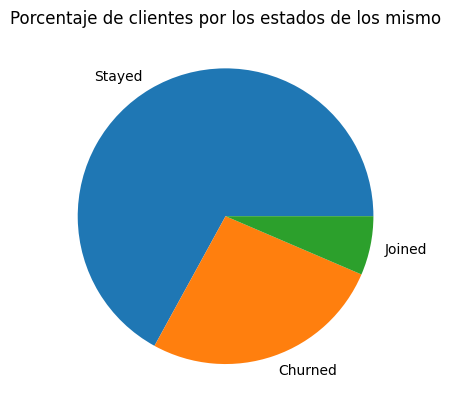

In [ ]:
cant = df_final['Customer Status'].value_counts()
total_clientes = len(df_final.index)
# Paso ese valor a % para poder graficarlo
cant_p = (cant * 100 ) / total_clientes
print (cant_p)

fig, y = plt.subplots ()
y.set_title("Porcentaje de clientes por los estados de los mismo")
y = plt.pie (cant_p  , labels = cant_p.index )


1. ¿Que porcentaje de clientes perdimos en el ultimo trimestre?

Luego de generar el grafico se puede observar que el 26% de los clientes estan descontratando el servicio. Y como podemos ver los nuevos clientes que contrataron el servicio llegan al 6% por ende estamos teniendo una gran perdida de clientes.

Esto genera otras dos consultas ¿Cual es el motivo principal que los clientes descontraten el servicio? y ¿A que se debe el baja contratacion del servicio?

### 2. ¿Cual es la causa principal de la perdida de clientes?
Se genera un gráfico de barras para analizar cuales son las causas de perdidas de clientes.


7043
No_Data            73.463013
Competitor         11.940934
Attitude            4.458327
Dissatisfaction     4.302144
Price               2.995882
Other               2.839699
Name: Churn Category, dtype: float64


Text(0, 0.5, 'Cantidad de clientes')

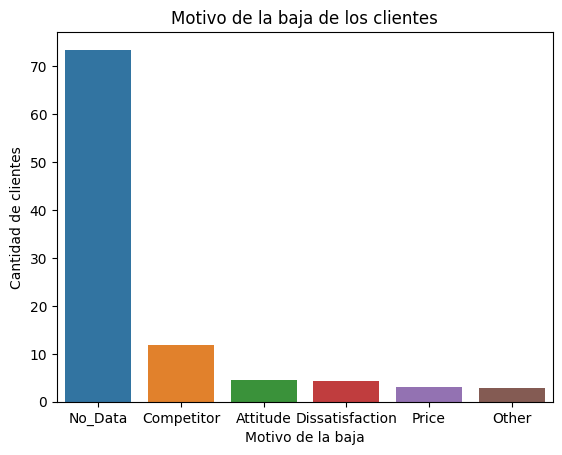

In [ ]:
cant = df_final['Churn Category'].value_counts()
total_clientes = len(df_final.index)
print (total_clientes)
# Paso ese valor a % para poder graficarlo
cant_p = (cant * 100 ) / total_clientes
print (cant_p)

#print (cant)
g = sns.barplot(data = df_final, x = cant_p.index, y =  cant_p)  
g.set_title("Motivo de la baja de los clientes")
g.set_xlabel('Motivo de la baja')
g.set_ylabel('Cantidad de clientes')

No_Data                                      73.463013
Competitor had better devices                 4.444129
Competitor made better offer                  4.415732
Attitude of support person                    3.123669
Don't know                                    1.845804
Competitor offered more data                  1.661224
Competitor offered higher download speeds     1.419849
Attitude of service provider                  1.334659
Price too high                                1.107483
Product dissatisfaction                       1.093284
Network reliability                           1.022292
Long distance charges                         0.908704
Service dissatisfaction                       0.894505
Moved                                         0.653131
Extra data charges                            0.553741
Limited range of services                     0.525344
Poor expertise of online support              0.440153
Lack of affordable download/upload speed      0.425955
Lack of se

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'No_Data'),
  Text(1, 0, 'Competitor had better devices'),
  Text(2, 0, 'Competitor made better offer'),
  Text(3, 0, 'Attitude of support person'),
  Text(4, 0, "Don't know"),
  Text(5, 0, 'Competitor offered more data'),
  Text(6, 0, 'Competitor offered higher download speeds'),
  Text(7, 0, 'Attitude of service provider'),
  Text(8, 0, 'Price too high'),
  Text(9, 0, 'Product dissatisfaction'),
  Text(10, 0, 'Network reliability'),
  Text(11, 0, 'Long distance charges'),
  Text(12, 0, 'Service dissatisfaction'),
  Text(13, 0, 'Moved'),
  Text(14, 0, 'Extra data charges'),
  Text(15, 0, 'Limited range of services'),
  Text(16, 0, 'Poor expertise of online support'),
  Text(17, 0, 'Lack of affordable download/upload speed'),
  Text(18, 0, 'Lack of self-service on Website'),
  Text(19, 0, 'Poor expertise of phone support'),
  Text(20, 0, 'Deceased')])

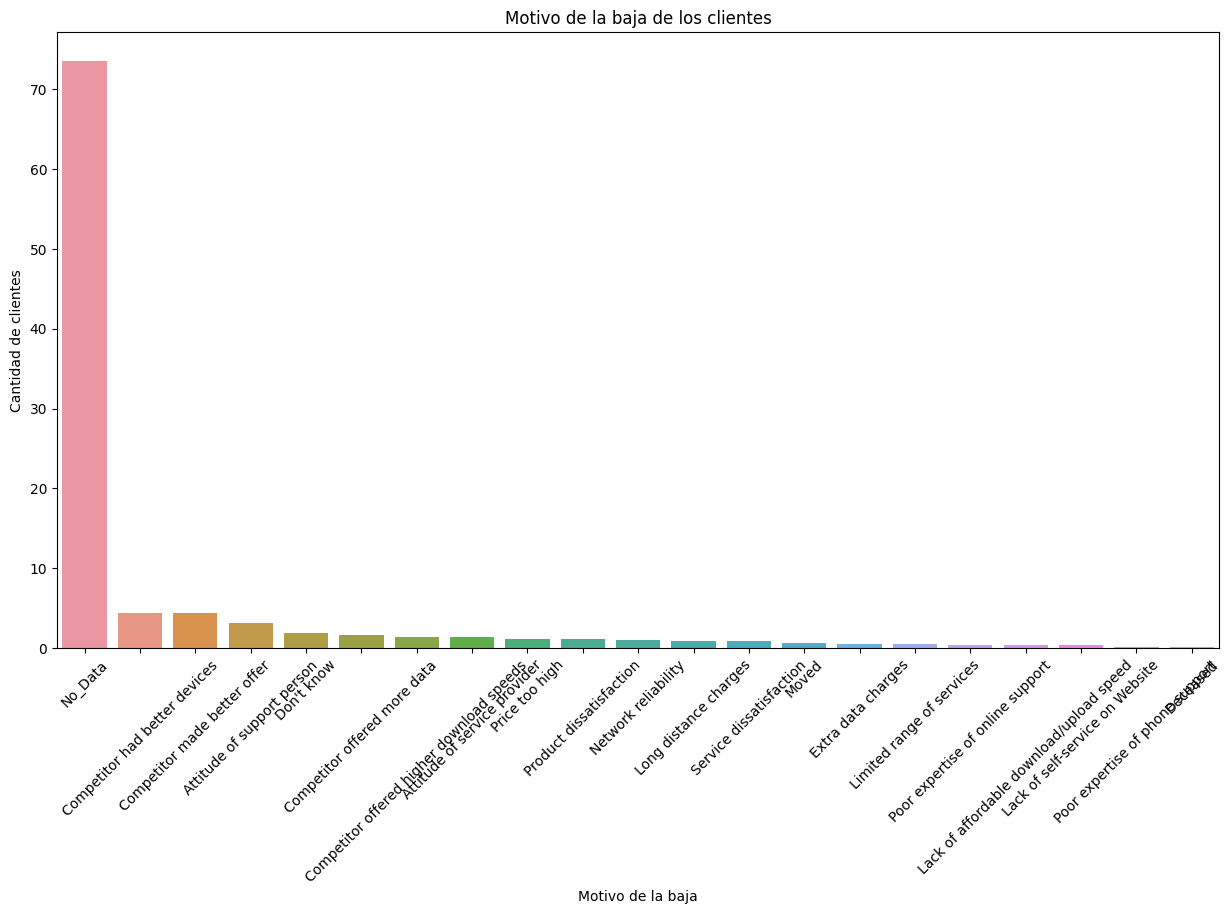

In [ ]:
cant = df_final['Churn Reason'].value_counts()
total_clientes = len(df_final.index)
#print (total_clientes)
# Paso ese valor a % para poder graficarlo
cant_p = (cant * 100 ) / total_clientes
print (cant_p)

#print (cant)
plt.figure(figsize = (15,8))

g = sns.barplot(data = df_final, x = cant_p.index, y =  cant_p  )

g.set_title("Motivo de la baja de los clientes")
g.set_xlabel('Motivo de la baja')
g.set_ylabel('Cantidad de clientes')

plt.xticks(rotation=45)

¿Cual es la causa principal de la perdida de clientes?



A partir del primer grafico podemos verificar que las principales causas de que los clientes soliciten la baja estan realacionadas 11% con la competencia, el 4% actitud, 4% por no estar satifecho con el servicio, 3% por el precio y 3% por otros motivos.

Con el segundo grafico vamos a analizar las causas mas detalladas para enteneder que fue lo que genero la mayor pedida de clientes. Las principales causas fueron las ofertas (4% de la bajas) y los dispositvos que ofrecen la copentencia (4% de la bajas).

### 3. ¿Que varibles tienen en comun los clientes que descontrataron el servicio (Por ejemplo: Edad, genero, etc)?
Se genera un grafico de puntos de dispercion para analizar si hay alguna relacion entre la edad y el genero entre los clientes que descontrataron el servicio.

Text(36.70517631172839, 0.5, 'Cantidad de clientes')

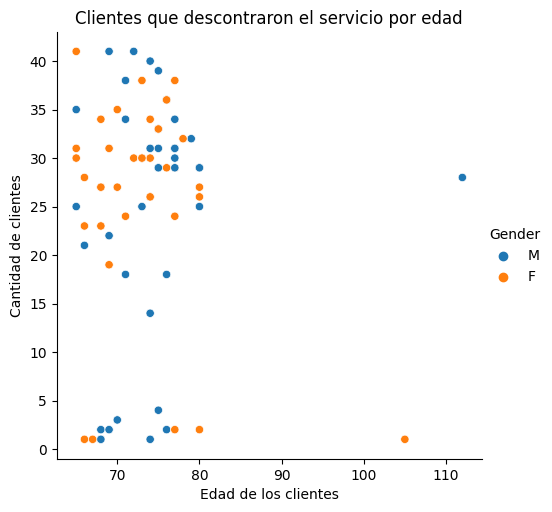

In [ ]:
g = sns.relplot(data = df_final, x = df_final['Age'].loc[df_final['Customer Status'] == "Churned"] , y = df_final['Age'].loc[df_final['Customer Status'] == "Churned"].value_counts () , hue = df_final['Gender'] )

plt.title("Clientes que descontraron el servicio por edad")
plt.xlabel('Edad de los clientes')
plt.ylabel('Cantidad de clientes')




¿Que varibles tienen en comun los clientes que descontrataron el servicio (Por ejemplo: Edad, genero, etc)?
La edad realizando un simple analisis con la variable del genero no parecen ser varibles que den incidios de un patron relacionado con la descontratacion del servicio.

### 4. ¿Que tipo de contranto tenian la mayoria de los clientes que abandonaron la empresa?
Se generan graficos de barras para ver la cantidad de clientes que descontrataron el servicio segun el tipo de contranto que tenian.


Month-to-Month    3610
Two Year          1883
One Year          1550
Name: Contract, dtype: int64


Text(0, 0.5, '% de clientes')

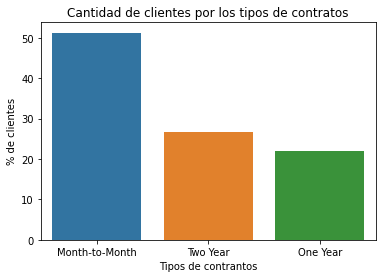

In [ ]:
#Calculo la cantiadad de clientes por tipos de contrato
y = df_final['Contract'].value_counts()
print (y)
# Total de los clientes
total_clientes = len(df_final.index)
#print (total_clientes)
# Paso ese valor a % para poder graficarlo
y_porcentaje = (df_final['Contract'].value_counts() * 100 ) / total_clientes
# Grafico de barras con Seaborn
g = sns.barplot(data = df_final, x = y_porcentaje.index, y =  y_porcentaje)  
g.set_title("Cantidad de clientes por los tipos de contratos")
g.set_xlabel('Tipos de contrantos')
g.set_ylabel('% de clientes')


Month-to-Month    1655
One Year           166
Two Year            48
Name: Contract, dtype: int64
1869
Month-to-Month    88.550027
One Year           8.881755
Two Year           2.568218
Name: Contract, dtype: float64


Text(0, 0.5, '% de clientes')

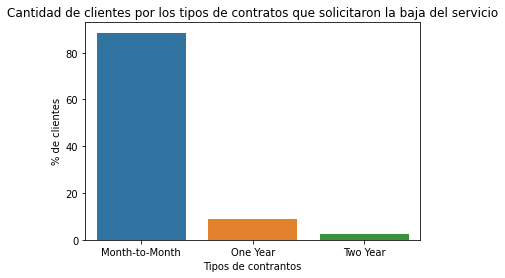

In [ ]:
#Calculo la cantiadad de clientes por tipos de contrato
y = df_final['Contract']
#print (y)
# Total de los clientes que descontrataron el servicio por cada tipo de contranto
y =  y.loc[df_final['Customer Status'] == "Churned"].value_counts ()
print (y)
# Total de clientes que descontrataron el servicio
total_clientes = len (df_final['Customer Status'].loc[df_final['Customer Status'] == "Churned"])
print (total_clientes)
y_porcentaje = (y * 100 ) / total_clientes 
print (y_porcentaje)

# Grafico de barras con Seaborn
g = sns.barplot(data = df_final, x = y_porcentaje.index, y =  y_porcentaje)  
g.set_title("Cantidad de clientes por los tipos de contratos que solicitaron la baja del servicio")
g.set_xlabel('Tipos de contrantos')
g.set_ylabel('% de clientes')



¿Que tipo de contranto tenian la mayoria de los clientes que abandonaron la empresa?
Se observa que el 88% de los clientes que descontrataron el sevicio tenian un contrato de mes a mes.


### 5. ¿Cuantas ofertas de servicios tuvieron los clientes que abandonaron la empresa?

None       1051
Offer E     426
Offer D     161
Offer B     101
Offer C      95
Offer A      35
Name: Offer, dtype: int64
1869
None       56.233280
Offer E    22.792937
Offer D     8.614232
Offer B     5.403959
Offer C     5.082932
Offer A     1.872659
Name: Offer, dtype: float64


Text(0, 0.5, '% de clientes')

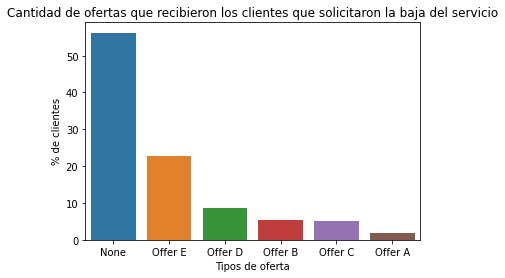

In [ ]:
#Calculo la cantiadad de clientes por tipos de contrato
y = df_final['Offer']
#print (y)
# Total de los clientes que descontrataron el servicio por cada tipo de contranto
y =  y.loc[df_final['Customer Status'] == "Churned"].value_counts ()
print (y)
# Total de clientes que descontrataron el servicio
total_clientes = len (df_final['Customer Status'].loc[df_final['Customer Status'] == "Churned"])
print (total_clientes)
y_porcentaje = (y * 100 ) / total_clientes 
print (y_porcentaje)

# Grafico de barras con Seaborn
g = sns.barplot(data = df_final, x = y_porcentaje.index, y =  y_porcentaje)  
g.set_title("Cantidad de ofertas que recibieron los clientes que solicitaron la baja del servicio")
g.set_xlabel('Tipos de oferta')
g.set_ylabel('% de clientes')

¿Cuantas ofertas de servicios tuvieron los clientes que abandonaron la empresa?
Se puede observar que el 56% de los clientes que abandonaron la empresa no recibieron una oferta antes de descontratar el servicio.

#  Ignorar, ya que no pertence a esta entrega

##  Modelo de árbol de decisión y logistica

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# manejo de data
import pandas as pd
#pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.3f}'.format

Age  La edad actual del cliente, en años, en el momento en que finalizó el trimestre.


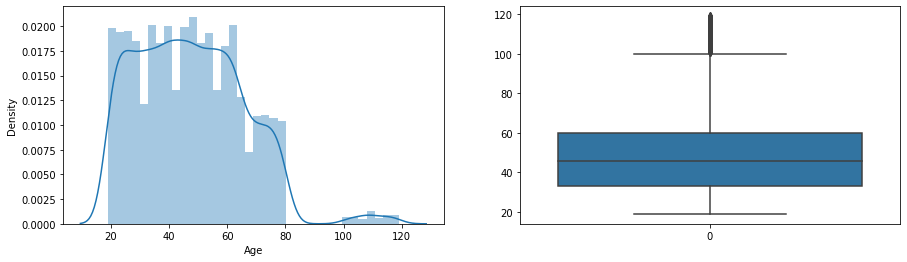

Tenure_in_Months  Indica la cantidad total de meses que el cliente ha estado con la empresa al final del trimestre especificado anteriormente.


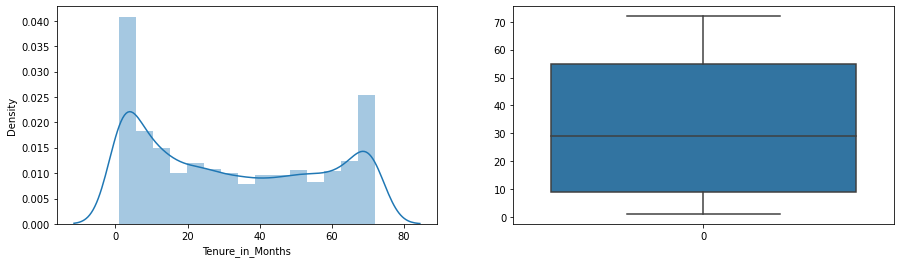

Total_Charges  Indica los cargos totales del cliente, calculados al final del trimestre especificado anteriormente.


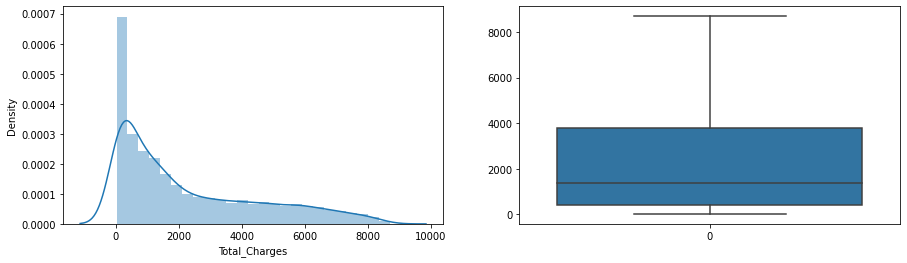

In [ ]:
for col in ['Age', 'Tenure_in_Months', 'Total_Charges']:
    print(col, d_desc[col])
    fig, ax = plt.subplots(1,2, figsize=(15, 4))
    ax[0] = sns.distplot(df_num[col], ax=ax[0])
    ax[1] = sns.boxplot(df_num[col], ax=ax[1])
    plt.show()

Age  La edad actual del cliente, en años, en el momento en que finalizó el trimestre.


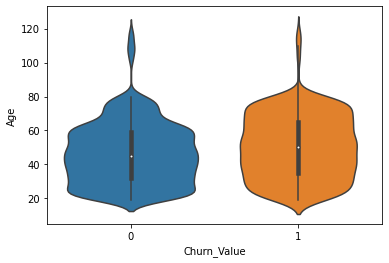

Tenure_in_Months  Indica la cantidad total de meses que el cliente ha estado con la empresa al final del trimestre especificado anteriormente.


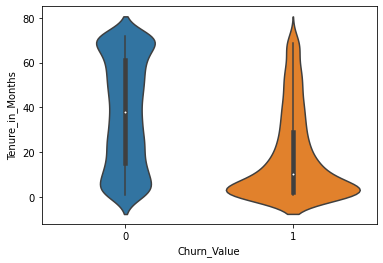

Total_Charges  Indica los cargos totales del cliente, calculados al final del trimestre especificado anteriormente.


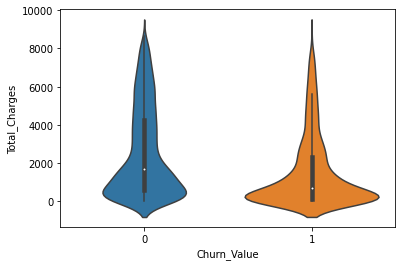

In [ ]:
for col in ['Age', 'Tenure_in_Months', 'Total_Charges']:
    print(col, d_desc[col])
    sns.violinplot(x='Churn_Value', y=col, data=df_num)
    plt.show()

A partir de los graficos anteriores podemos ver que la mayoria de los clientes que abandonaron la empresa no tenian un monto muy elevado de cargos totales y eran clientes relativamente nuevos.

## Inputs del modelo:

In [ ]:
columnas1 = df_num.drop(['Churn_Value'], axis = 1).columns.tolist()[:-1] 
columnas1

['Count_x',
 'Count_y',
 'Number_of_Referrals',
 'Tenure_in_Months',
 'Avg Monthly Long Distance Charges',
 'Avg Monthly GB Download',
 'Monthly Charge',
 'Total_Charges',
 'Total Refunds',
 'Total Extra Data Charges',
 'Total Long Distance Charges',
 'Total Revenue',
 'Count',
 'Age',
 'Number of Dependents']

Pero también podríamos hacer pruebas con otras combinaciones de columnas:

#### Columna 2

In [ ]:
# Saco el numero de referencias que hicieron, la edad y el target 
columnas2 = df_num.drop(['Number_of_Referrals', 'Age','Churn_Value', 'Tenure_in_Months', 'Total_Charges'], axis = 1).columns.tolist()[:-1] 


### Train & Test Split 

In [ ]:
# split del dataset
from sklearn.model_selection import train_test_split

In [ ]:
# separamos las caracteristicas/features del target
X = df_num[columnas1]#.drop('y', axis=1)
y = df_num['Churn_Value']

In [ ]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=33,
                                                    stratify= y)


print('Tamaño del set de entrenamiento:', X_train.shape)
print('Tamaño del set de testeo:', X_test.shape)

Tamaño del set de entrenamiento: (5634, 15)
Tamaño del set de testeo: (1409, 15)


In [ ]:
# porcentaje de clase True en train
100*y_train.sum()/len(y_train)

26.53532126375577

In [ ]:
# porcentaje de clase True en test
100*y_test.sum()/len(y_test)

26.543647977288856

## Árbol de Decisión:
Pros:
-------
* alta capacidad de explicar la decisión
* aceptan variables categóricas

Contras:
-----------
* necesitan data balanceada
* tienen a sobre ajuste

In [ ]:
# modelos
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Paso 1: Instanciar el objeto/modelo
tree_model = DecisionTreeClassifier(random_state = 0, class_weight='balanced')

### Entrenamiento, predicción y evaluación:

In [ ]:
# entrenamiento
#Paso 2: Ajustar el modelo con los datos
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=0)

### Predicciones:

In [ ]:
# predicciones
# Paso 3: Predecir
y_pred = tree_model.predict(X_test)
y_pred_train = tree_model.predict(X_train)

In [ ]:
X_test.shape, y_test.shape

((1409, 15), (1409,))

In [ ]:
y_pred.shape

(1409,)

Miramos las 10 primeras predicciones:

In [ ]:
X_test.head(10)

,Count_x,Count_y,Number_of_Referrals,Tenure_in_Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total_Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Count,Age,Number of Dependents
2555,1,1,0,1,24.480,0,20.200,20.200,0.000,0,24.480,44.680,1,35,0
3575,1,1,0,20,33.140,17,59.200,1191.200,0.000,130,662.800,1984.000,1,53,0
3095,1,1,0,5,24.610,0,20.500,104.300,0.000,0,123.050,227.350,1,44,0
3606,1,1,8,6,31.730,0,25.400,153.300,0.000,0,190.380,343.680,1,58,3
551,1,1,1,47,42.290,22,84.950,4018.050,0.000,80,1987.630,6085.680,1,72,1
4262,1,1,0,72,45.750,0,19.300,1414.800,0.000,0,3294.000,4708.800,1,57,0
4143,1,1,9,71,32.180,0,24.500,1816.200,0.000,0,2284.780,4100.980,1,20,0
1674,1,1,0,4,30.440,10,50.400,206.600,0.000,0,121.760,328.360,1,60,0
5549,1,1,0,51,47.430,0,20.450,1042.650,0.000,0,2418.930,3461.580,1,36,0
1295,1,1,0,58,44.500,47,103.250,6017.650,0.000,0,2581.000,8598.650,1,20,0


In [ ]:
y_pred[:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1])

Y lo comparamos con el valor real del target de las 10 primeras filas

---



In [ ]:
y_test[:10].values

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

### Evaluación 

In [ ]:
# evaluacion 
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Evaluamos el modelo en el conjunto de testeo:

In [ ]:
recall = recall_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train)
acc = accuracy_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train)

print('METRICAS TRAIN:')
print('Recall: {:.4f}'.format(recall))
print('Precision: {:.4f}'.format(precision))
print('F1: {:.4f}'.format(f1))
print('Accuracy: {:.4f}'.format(acc))

METRICAS TRAIN:
Recall: 1.0000
Precision: 1.0000
F1: 1.0000
Accuracy: 1.0000


Evaluamos el modelo ya entrenado en el conjunto de testeo:

In [ ]:
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('METRICAS TEST:')
print('Recall: {:.4f}'.format(recall))
print('Precision: {:.4f}'.format(precision))
print('F1: {:.4f}'.format(f1))
print('Accuracy: {:.4f}'.format(acc))

METRICAS TEST:
Recall: 0.5134
Precision: 0.5147
F1: 0.5141
Accuracy: 0.7424


A partir de estos resultados se decide utilizar las variables de texto del DataSet Final que sean "yes" o "no" y remplazarlas por 1 (yes) o 0 (no) segun corresponda.
Con esto buscamos mejorar los resultados obtenidos con el modelo utilizado.

## Modelo de arbol utilizando utlizando mas variables

### Data

In [ ]:
#Para poder utilizar mas variables vamos a replanzar los yes/no por 1/0 segun corresponda

df_final = df_final.replace({"Yes": 1, "No": 0})

df_num = df_final.select_dtypes('number') # datos númericos
df_num ['Customer ID'] = df_final ['Customer ID']
df_num.head (5)


,Count_x,Churn_Label,Churn_Value,Count_y,Referred a Friend,Number_of_Referrals,Tenure_in_Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Total Long Distance Charges,Total Revenue,Count,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Customer ID
0,1,1,1,1,0,0,1,0,0.000,0,...,0.000,59.650,1,78,0,1,0,0,0,8779-QRDMV
1,1,1,1,1,1,1,8,1,48.850,1,...,390.800,1024.100,1,74,0,1,1,1,1,7495-OOKFY
2,1,1,1,1,0,0,18,1,11.330,1,...,203.940,1910.880,1,71,0,1,0,1,3,1658-BYGOY
3,1,1,1,1,1,1,25,1,19.760,0,...,494.000,2995.070,1,78,0,1,1,1,1,4598-XLKNJ
4,1,1,1,1,1,1,37,1,6.330,1,...,234.210,3102.360,1,80,0,1,1,1,1,4846-WHAFZ


### Inputs del modelo:

In [ ]:
columnas1 = df_num.drop(['Churn_Value','Churn_Label'], axis = 1).columns.tolist()[:-1] 
columnas1


['Count_x',
 'Count_y',
 'Referred a Friend',
 'Number_of_Referrals',
 'Tenure_in_Months',
 'Phone Service',
 'Avg Monthly Long Distance Charges',
 'Multiple Lines',
 'Internet Service',
 'Avg Monthly GB Download',
 'Online Security',
 'Online Backup',
 'Device Protection Plan',
 'Premium Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Streaming Music',
 'Unlimited Data',
 'Paperless Billing',
 'Monthly Charge',
 'Total_Charges',
 'Total Refunds',
 'Total Extra Data Charges',
 'Total Long Distance Charges',
 'Total Revenue',
 'Count',
 'Age',
 'Under 30',
 'Senior Citizen',
 'Married',
 'Dependents',
 'Number of Dependents']

#### Train & Test Split 

In [ ]:
# separamos las caracteristicas/features del target
X = df_num[columnas1]#.drop('y', axis=1)
y = df_num['Churn_Value']


In [ ]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=33,
                                                    stratify= y)


print('Tamaño del set de entrenamiento:', X_train.shape)
print('Tamaño del set de testeo:', X_test.shape)

Tamaño del set de entrenamiento: (5634, 32)
Tamaño del set de testeo: (1409, 32)


In [ ]:
# porcentaje de clase True en train
100*y_train.sum()/len(y_train)

26.53532126375577

In [ ]:
# porcentaje de clase True en test
100*y_test.sum()/len(y_test)

26.543647977288856

In [ ]:
# Paso 1: Instanciar el objeto/modelo
tree_model = DecisionTreeClassifier(random_state = 0, class_weight='balanced')

### Árbol de Decisión:
Pros:
-------
* alta capacidad de explicar la decisión
* aceptan variables categóricas

Contras:
-----------
* necesitan data balanceada
* tienen a sobre ajuste

#### Entrenamiento, predicción y evaluación:

In [ ]:
# entrenamiento
#Paso 2: Ajustar el modelo con los datos
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=0)

#### Predicciones:

In [ ]:
# predicciones
# Paso 3: Predecir
y_pred = tree_model.predict(X_test)
y_pred_train = tree_model.predict(X_train)

In [ ]:
X_test.shape, y_test.shape

((1409, 32), (1409,))

In [ ]:
y_pred.shape

(1409,)

Miramos las 10 primeras predicciones:

In [ ]:
X_test.head(10)

,Count_x,Count_y,Referred a Friend,Number_of_Referrals,Tenure_in_Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Count,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
2555,1,1,0,0,1,1,24.480,0,0,0,...,0,24.480,44.680,1,35,0,0,0,0,0
3575,1,1,0,0,20,1,33.140,1,1,17,...,130,662.800,1984.000,1,53,0,0,0,0,0
3095,1,1,0,0,5,1,24.610,0,0,0,...,0,123.050,227.350,1,44,0,0,0,0,0
3606,1,1,1,8,6,1,31.730,1,0,0,...,0,190.380,343.680,1,58,0,0,1,1,3
551,1,1,1,1,47,1,42.290,0,1,22,...,80,1987.630,6085.680,1,72,0,1,1,1,1
4262,1,1,0,0,72,1,45.750,0,0,0,...,0,3294.000,4708.800,1,57,0,0,0,0,0
4143,1,1,1,9,71,1,32.180,1,0,0,...,0,2284.780,4100.980,1,20,1,0,1,0,0
1674,1,1,0,0,4,1,30.440,1,1,10,...,0,121.760,328.360,1,60,0,0,0,0,0
5549,1,1,0,0,51,1,47.430,0,0,0,...,0,2418.930,3461.580,1,36,0,0,0,0,0
1295,1,1,0,0,58,1,44.500,1,1,47,...,0,2581.000,8598.650,1,20,1,0,0,0,0


In [ ]:
y_pred[:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1])

Y lo comparamos con el valor real del target de las 10 primeras filas

In [ ]:
y_test[:10].values

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

#### Evaluación 

Evaluamos el modelo en el conjunto de testeo:

In [ ]:
recall = recall_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train)
acc = accuracy_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train)

print('METRICAS TRAIN:')
print('Recall: {:.4f}'.format(recall))
print('Precision: {:.4f}'.format(precision))
print('F1: {:.4f}'.format(f1))
print('Accuracy: {:.4f}'.format(acc))

METRICAS TRAIN:
Recall: 1.0000
Precision: 1.0000
F1: 1.0000
Accuracy: 1.0000


Evaluamos el modelo ya entrenado en el conjunto de testeo:

In [ ]:
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('METRICAS TEST:')
print('Recall: {:.4f}'.format(recall))
print('Precision: {:.4f}'.format(precision))
print('F1: {:.4f}'.format(f1))
print('Accuracy: {:.4f}'.format(acc))

METRICAS TEST:
Recall: 0.5241
Precision: 0.5681
F1: 0.5452
Accuracy: 0.7679


Se logro mejorar muy poco el porcetanje a partir de utlizar todas las varibles numericas posibles. Se logro un Accuracy del 76%.

In [ ]:
confusion_matrix(y_test, y_pred)

array([[886, 149],
       [178, 196]])

In [ ]:
y_test.value_counts()

0    1035
1     374
Name: Churn_Value, dtype: int64

In [ ]:
type(y_pred)

numpy.ndarray

In [ ]:
pd.Series(y_pred).value_counts()

0    1064
1     345
dtype: int64

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1035
           1       0.57      0.52      0.55       374

    accuracy                           0.77      1409
   macro avg       0.70      0.69      0.69      1409
weighted avg       0.76      0.77      0.76      1409



####  Probabilidades

In [ ]:
proba = tree_model.predict_proba(X_test)

proba

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

#### Feature importance

In [ ]:
tree_model.feature_importances_

array([0.        , 0.        , 0.01495258, 0.16971669, 0.09778204,
       0.00035499, 0.05490675, 0.01041712, 0.        , 0.1091412 ,
       0.01222085, 0.01062886, 0.00678871, 0.0241718 , 0.0016426 ,
       0.00041651, 0.00313677, 0.00593059, 0.01179423, 0.1146233 ,
       0.08435135, 0.0146094 , 0.01366495, 0.05495585, 0.05504558,
       0.        , 0.06913618, 0.00405741, 0.00231056, 0.01662531,
       0.00811273, 0.02850507])

In [ ]:
df_importancia = pd.DataFrame({'Variable': X_train.columns.values.tolist(),
                               'Importancia': tree_model.feature_importances_}).sort_values(by='Importancia', ascending=False)

df_importancia

,Variable,Importancia
3,Number_of_Referrals,0.170
19,Monthly Charge,0.115
9,Avg Monthly GB Download,0.109
4,Tenure_in_Months,0.098
20,Total_Charges,0.084
26,Age,0.069
24,Total Revenue,0.055
23,Total Long Distance Charges,0.055
6,Avg Monthly Long Distance Charges,0.055
31,Number of Dependents,0.029


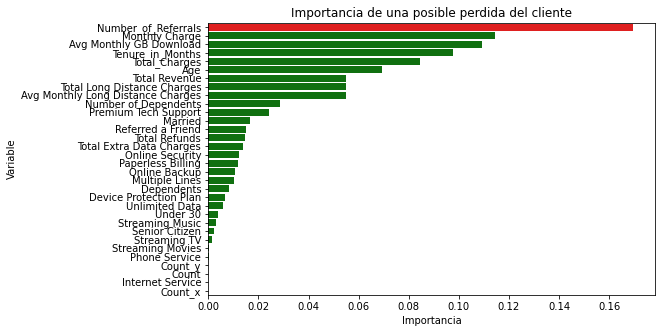

In [ ]:
plt.figure(figsize=(8,5))

values = df_importancia.Importancia    

sns.barplot(y=df_importancia.Variable,
            x=values,
            palette = ['green' if (x < max(values)) else 'red' for x in values ]
           ).set(title='Importancia de una posible perdida del cliente')

plt.show()

##  Comparativas variando campos:

In [ ]:
# inicializo los dataframes en donde voy a guardar la información de las métricas:
metricas_train = pd.DataFrame({'metricas':['recall', 'precision', 'accuracy', 'f1']})
metricas_test = pd.DataFrame({'metricas':['recall', 'precision', 'accuracy', 'f1']})

columnas3 = df_importancia.Variable.tolist()[:4]+['Churn_Value']

for i, comb in enumerate([columnas1, columnas2, columnas3]):
    
    # separamos el target 
    x = df_num[comb]
    y = df_num['Churn_Value']

    # dividimos en train y test 
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, # nos quedata dividido en 80% train y 20% test
                                                    random_state=33,# es la semilla para que cada vez que lo corramos de lo mismo
                                                    stratify = y)   # se separa "parejo" respecto a la variable y
                                                    
    # modelo
    tree_model = DecisionTreeClassifier(random_state = 42,
                                        class_weight='balanced') # para lidear con data desbalanceada
    # entrenamos y predecimos
    print('Entrenando modelo nro: ', i)
    tree_model.fit(X_train, y_train)
    
    y_pred = tree_model.predict(X_test)
    y_pred_train = tree_model.predict(X_train)
    
    # calculamos y guardamos los valores recall, precision, accuracy y f1
    metricas_train['mod'+str(i)] = [recall_score(y_train, y_pred_train), 
                                    precision_score(y_train, y_pred_train),
                                    accuracy_score(y_train, y_pred_train),
                                    f1_score(y_train, y_pred_train)]
    
    metricas_test['mod'+str(i)] = [recall_score(y_test, y_pred),
                                   precision_score(y_test, y_pred),
                                   accuracy_score(y_test, y_pred),
                                   f1_score(y_test, y_pred)]
    
    

Entrenando modelo nro:  0
Entrenando modelo nro:  1
Entrenando modelo nro:  2


In [ ]:
metricas_train.set_index('metricas').T

metricas,recall,precision,accuracy,f1
mod0,1.000,1.000,1.000,1.000
mod1,1.000,1.000,1.000,1.000
mod2,1.000,1.000,1.000,1.000


In [ ]:
metricas_test.set_index('metricas').T.sort_values(by='f1', ascending = False)

metricas,recall,precision,accuracy,f1
mod0,0.537,0.581,0.774,0.558
mod1,0.537,0.581,0.774,0.558
mod2,0.537,0.581,0.774,0.558


Se intenta probar el modelo con otro conjunto de datos para intentar detectar un overfitting pero se obtienen los mismo resultados.

#   APIS

A continuacion dejo el Link de la API utilizada, donde se puede ver los endpoint:
https://rapidapi.com/VanitySoft/api/boundaries-io-1

La idea es a partir de los codigos postales de los clientes buscar un poco mas de informacion de la zona donde reciden para luego con toda esa informacion poder generar un mapa y analizar de que zonas son los clientes que descontrataron el servicio.

In [ ]:
cod_postales = df4['Zip_Code'].unique() # Los valores unicos de los codigos postales de los clientes
cod_postales

array([90022, 90063, 90065, ..., 91934, 92105, 92250])

In [ ]:
len(df4['Zip_Code'].unique())
  

1626

In [ ]:
import requests
import json 

url = "https://vanitysoft-boundaries-io-v1.p.rapidapi.com/reaperfire/rest/v1/public/boundary"

headers = {
	"content-type": "application/octet-stream",
	"X-RapidAPI-Key": "99a1515367msh150addc7e3fd3acp147c17jsn498d9530d2e2",
	"X-RapidAPI-Host": "vanitysoft-boundaries-io-v1.p.rapidapi.com"
}

querystring = {"zipcode":"90063"}    # Prueba para verificar que se realicen bien las consultas 

response = requests.get(url, headers=headers, params=querystring)

print(response.text)

respuesta = response.json()

{"type":"FeatureCollection","features":[{"type":"Feature","properties":{"zipCode":"90063","country":"US","city":"Los angeles","county":"Los angeles","state":"CA"},"geometry":{"type":"Polygon","coordinates":[[[-118.206036,34.034909],[-118.204739,34.034775],[-118.203403,34.03688],[-118.202278,34.036379],[-118.201266,34.037993],[-118.20337,34.038932],[-118.200403,34.043551],[-118.197766,34.044095],[-118.199555,34.044896],[-118.196999,34.050064],[-118.195188,34.05297],[-118.192564,34.054762],[-118.192625,34.061762],[-118.192638,34.063153],[-118.186107,34.062523],[-118.18503,34.061757],[-118.181303,34.061754],[-118.179064,34.062236],[-118.178214,34.061396],[-118.174256,34.061347],[-118.173396,34.060453],[-118.169256,34.061489],[-118.169273,34.050737],[-118.171037,34.050127],[-118.173905,34.051314],[-118.175714,34.05015],[-118.175623,34.047798],[-118.173599,34.045229],[-118.173556,34.034363],[-118.173889,34.03335],[-118.180174,34.033336],[-118.18015,34.028323],[-118.182489,34.02892],[-118.18

In [ ]:
# (len(df4['Zip_Code'].unique())  -> Este es el rango que deberia utitlizar en el FOR para poder consultar por cada codigo postal pero ya que tengo una cantidad de consultas limitada por dia ya que es una API gratis 

# For para consultar por cada uno de los codigos postales de cada cliente para extraer mas informacion, como ciudad, latitud y logitud,etc
for i in range (5) :
  querystring = {"zipcode":cod_postales[i]}
  response = requests.get(url, headers=headers, params=querystring)

  respuesta = response.json()
  
  if i < 1 :  # genero el DataFrame 
    datatest = respuesta['features'][0]['geometry']
    dfcod_post= pd.DataFrame.from_dict(datatest, orient='index')
    dfcod_post = dfcod_post.transpose()
  
  else : # Agrego filas al DataFrame generado anteriormente 
    datatest = respuesta['features'][0]['geometry']
    dftest= pd.DataFrame.from_dict(datatest, orient='index')
    dftest = dftest.transpose()

    dfcod_post = dfcod_post.append (dftest ,  ignore_index=True)   # Agregar columna al DataFrame

dfcod_post.head(5)


<ipython-input-30-757a91c056dc>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfcod_post = dfcod_post.append (dftest ,  ignore_index=True)   # Agregar columna al DataFrame
<ipython-input-30-757a91c056dc>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfcod_post = dfcod_post.append (dftest ,  ignore_index=True)   # Agregar columna al DataFrame
<ipython-input-30-757a91c056dc>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfcod_post = dfcod_post.append (dftest ,  ignore_index=True)   # Agregar columna al DataFrame
<ipython-input-30-757a91c056dc>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfcod_post = dfcod_post.append (df

,type,coordinates
0,Polygon,"[[[-118.175714, 34.05015], [-118.173905, 34.05..."
1,Polygon,"[[[-118.206036, 34.034909], [-118.204739, 34.0..."
2,Polygon,"[[[-118.254135, 34.11886], [-118.251133, 34.12..."
3,Polygon,"[[[-118.347159, 33.933145], [-118.347159, 33.9..."
4,Polygon,"[[[-118.050863, 33.95887], [-118.045768, 33.96..."


#  AGREGADO DE MAPA (IGNORAR, TODAVIA LO ESTOY TRABAJANDO)


In [ ]:
import sys

In [ ]:
'geopandas' in sys.modules


False

In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 61.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 41.2 MB/s eta 0:00:00


In [ ]:
pip install contextily


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 3.4 MB/s eta 0:00:00


In [ ]:
%matplotlib inline

import geopandas as gpd
import rasterio
from rasterio.plot import show as rioshow
from shapely.geometry import box, Point
from contextily import Place
import contextily as cx
import numpy as np
from matplotlib import pyplot as plt
import rasterio
from rasterio.plot import show as rioshow

plt.rcParams["figure.dpi"] = 70 # lower image size

In [ ]:
ubicacion_clientes.head(5)

AttributeError: ignored

In [ ]:
db = gpd.read_file(ubicacion_clientes)

Streaming output truncated to the last 5000 lines.
ERROR:fiona._env:Pointer 'hGeom' is NULL in 'OGR_G_GetGeometryType'.

ERROR:fiona._env:Pointer 'hGeom' is NULL in 'OGR_G_GetGeometryType'.

ERROR:fiona._env:Pointer 'hGeom' is NULL in 'OGR_G_GetGeometryType'.

ERROR:fiona._env:Pointer 'hGeom' is NULL in 'OGR_G_GetGeometryType'.

ERROR:fiona._env:Pointer 'hGeom' is NULL in 'OGR_G_GetGeometryType'.

ERROR:fiona._env:Pointer 'hGeom' is NULL in 'OGR_G_GetGeometryType'.

ERROR:fiona._env:Pointer 'hGeom' is NULL in 'OGR_G_GetGeometryType'.

ERROR:fiona._env:Pointer 'hGeom' is NULL in 'OGR_G_GetGeometryType'.

ERROR:fiona._env:Pointer 'hGeom' is NULL in 'OGR_G_GetGeometryType'.

ERROR:fiona._env:Pointer 'hGeom' is NULL in 'OGR_G_GetGeometryType'.

ERROR:fiona._env:Pointer 'hGeom' is NULL in 'OGR_G_GetGeometryType'.

ERROR:fiona._env:Pointer 'hGeom' is NULL in 'OGR_G_GetGeometryType'.

ERROR:fiona._env:Pointer 'hGeom' is NULL in 'OGR_G_GetGeometryType'.

ERROR:fiona._env:Pointer 'hGeom' is NUL

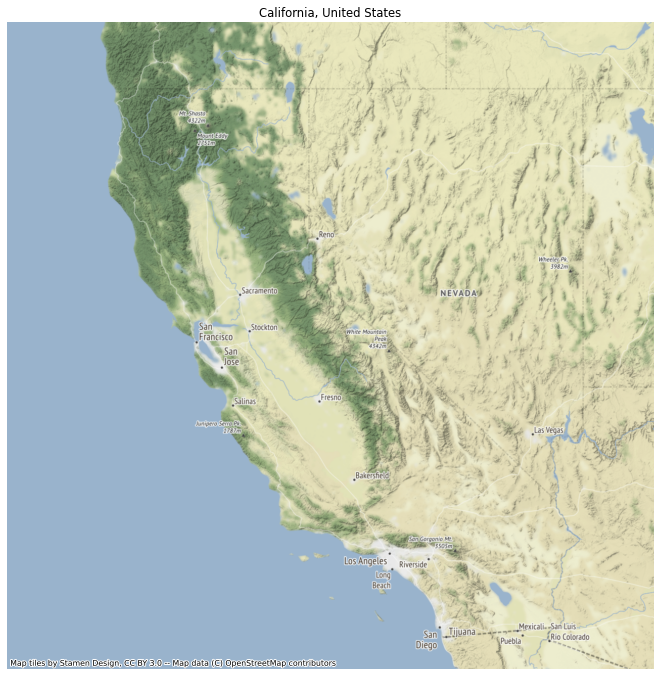

In [ ]:
fig, ax = plt.subplots()

madrid = Place("California")
ax.plot(ax=, color='white', edgecolor='black')
ax = madrid.plot()

In [ ]:


# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')





plt.show();

NameError: ignored

https://contextily.readthedocs.io/en/latest/intro_guide.html#Coordinate-based-searches


https://contextily.readthedocs.io/en/latest/warping_guide.html


https://geopy.readthedocs.io/en/stable/
